Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns. 



Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.(https://www.kaggle.com/ninzaami/loan-predication)

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

# Import dataset

In [6]:
loan = pd.read_csv("loan.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# check missing values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# we have 614 rows, the miss values are less than 50, so we can delete missing values, it will not affect yhe analysis
loan = loan.dropna()

In [12]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [13]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# we can know after delete the missing values, the mean, std don't change a lot
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [19]:
# Dependents column values
loan['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [20]:
# Dependents column has 0, 1, 2, 3+, we need to replace 3+ with 4
loan = loan.replace(to_replace ='3+', value =4)

In [21]:
loan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [24]:
# convert Loan_Status from categoric to numerical values
loan.replace({"Loan_Status":{"N": 0, "Y": 1}}, inplace=True)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


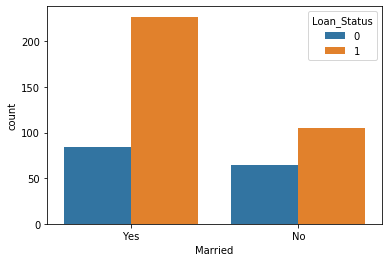

In [25]:
# Married & Loan_Status 
sns.countplot(x= 'Married', hue = 'Loan_Status', data = loan)

In [26]:
# check Property_Area values 
loan['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [27]:
# convert categorical values to numeric values
loan.replace({'Gender':{'Male':0, "Female":1}, "Married":{"Yes":1, "No":0}, 
             "Education":{"Not Graduate":0, "Graduate":1},"Self_Employed":{"No":0, "Yes":1}, 
              "Property_Area":{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace=True)

In [28]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [29]:
# drop Loan_ID
loan = loan.drop(columns = 'Loan_ID')
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Split the data

In [30]:
X = loan.drop(columns = 'Loan_Status')
print(X)
y = loan['Loan_Status']
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [35]:
# split dataset 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify =y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [36]:
# Training the model - SVM
classifier = svm.SVC(kernel = 'linear')

In [37]:
# train SVM model
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
# accuracy score on training data
train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(train_prediction, y_train)
print("Accuracy on training data:", train_accuracy)

Accuracy on training data: 0.7890625


In [40]:
# accuracy score on test data
test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(test_prediction, y_test)
print("Accuracy on test data:", test_accuracy)

Accuracy on test data: 0.8229166666666666


In [42]:
# training random forests model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
# accuracy score on test data
rf_prediction = rf.predict(X_test)

# calculate the absolute errors
errors = abs(rf_prediction - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.28 degrees.


In [48]:
# Determine Performance Metrics
# To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.

# calculate mean absolute percentage error (MAPE)
mape = 100* (errors / y_test)  
mape


205    14.4
549     1.0
513     inf
415     4.7
271     8.7
       ... 
201    48.9
345    22.1
607    49.0
543    13.9
469     inf
Name: Loan_Status, Length: 96, dtype: float64

In [49]:
# calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') ## because y = 0, 1, so it is infinite

Accuracy: -inf %.
